## Week 1 Assignment: Collisions on Figueroa Boulevard (Nov. 2018-Feb. 2020)

The dataset I've uploaded consists of collision details including geolocation for incidents on Figueroa Boulevard between November 2018 and February 2020. This time period is significant because it is after the street installed an all-day bus lane between Adams Boulevard and 6th Street. Below I will run queries to find trends in the dataset that may hint at potential relationships of collisions on the corridor. 

First, I will import geopands in order to run queries using Python. 

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Now I will introduce my dataset: 

In [5]:
figueroa = gpd.read_file('Figueroa_Adams to 6th St_After Bus_Nov 2018 - Feb 2020.csv')

Looks like it worked! Now that I have the collision data uploaded, let's start exploring!

In [6]:
type (figueroa)

geopandas.geodataframe.GeoDataFrame

Let's start by getting a bird's eye-view look of our data: 

In [13]:
figueroa.info

<bound method DataFrame.info of      case_id collision_date collision_time day_of_week  m_primaryrd  \
0    8727359        2/13/19           2310   Wednesday  FIGUEROA ST   
1    8764913        12/6/18           1430    Thursday  FIGUEROA ST   
2    8776974       11/30/18           1125      Friday  FIGUEROA ST   
3    8786807       12/23/18           2500      Sunday  FIGUEROA ST   
4    8786923         1/1/19             25     Tuesday  FIGUEROA ST   
..       ...            ...            ...         ...          ...   
156  9081174        2/13/20           1520    Thursday  FIGUEROA ST   
157  9085175         2/7/20            905      Friday      20TH ST   
158  9093592        2/11/20            610     Tuesday  FIGUEROA ST   
159  9098882        2/24/20            805      Monday  FIGUEROA ST   
160  9255116         2/1/20           1515    Saturday  FIGUEROA ST   

        m_secondrd distance   direction       point_x      point_y  ...  \
0    WILSHIRE BLVD        0  Not Stated 

There is a lot going on! There is so much information per row that it doesn't fit on the screen.

I'm going to to use the head and tail queries to get a more tidy snapshot of the first and last five entries in the dataset. 

In [8]:
figueroa.head ()

,case_id,collision_date,collision_time,day_of_week,m_primaryrd,m_secondrd,distance,direction,point_x,point_y,...,party_sex3,party_dir3,movement3,sobriety3,drug3,veh_type3,veh_year3,veh_make3,safety_eq3,geometry
0,8727359,2/13/19,2310,Wednesday,FIGUEROA ST,WILSHIRE BLVD,0,Not Stated,-118.2592621,34.05004501,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
1,8764913,12/6/18,1430,Thursday,FIGUEROA ST,ADAMS BLVD,230,North,-118.2756874,34.02871323,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
2,8776974,11/30/18,1125,Friday,FIGUEROA ST,8TH ST,190,North,-118.2608657,34.04835129,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
3,8786807,12/23/18,2500,Sunday,FIGUEROA ST,8TH PL,20,North,-118.2622159,34.04685211,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
4,8786923,1/1/19,25,Tuesday,FIGUEROA ST,11TH ST,57,North,-118.265091,34.04380035,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None


And now the last 5 entries.

In [9]:
figueroa.tail ()

,case_id,collision_date,collision_time,day_of_week,m_primaryrd,m_secondrd,distance,direction,point_x,point_y,...,party_sex3,party_dir3,movement3,sobriety3,drug3,veh_type3,veh_year3,veh_make3,safety_eq3,geometry
156,9081174,2/13/20,1520,Thursday,FIGUEROA ST,20TH ST,10,South,-118.2729766,34.03293991,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
157,9085175,2/7/20,905,Friday,20TH ST,FIGUEROA ST,0,Not Stated,-118.2729622,34.03296661,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
158,9093592,2/11/20,610,Tuesday,FIGUEROA ST,7TH ST,0,Not Stated,-118.2599022,34.04938507,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None
159,9098882,2/24/20,805,Monday,FIGUEROA ST,20TH ST,0,Not Stated,-118.2729622,34.03296661,...,Male,North,Proceeding Straight,Had Not Been Drinking,Not Stated,Emergency Vehicle,2014,BMW,Air Bag Not Deployed,None
160,9255116,2/1/20,1515,Saturday,FIGUEROA ST,7TH ST,90,South,-118.2600857,34.04919052,...,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,,,Not Stated,None


I was a bit confused at first because I only counted 60 columns on my spreadsheet. But I now realize that Jupyter has created an additional column on the far left indicating what number entry each incident is. In total, I have 161 collisions. 

In [11]:
figueroa.shape

(161, 61)

Just as I expected, there are 161 collisions and 61 columns including the one created by Jupyter. 

Let's see what kind of data types we have in our dataset.

In [12]:
figueroa.dtypes

case_id             object
collision_date      object
collision_time      object
day_of_week         object
m_primaryrd         object
                    ...   
veh_type3           object
veh_year3           object
veh_make3           object
safety_eq3          object
geometry          geometry
Length: 61, dtype: object

Now I'm going to run a plot to see what type of visual is generated. As we've seen, there is a lot of data per collision (which is exciting!), but I'm not sure how this is going to translate into a visual. 

<AxesSubplot:>

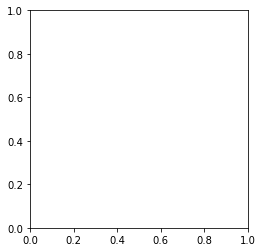

In [16]:
figueroa.plot ()

Nothing happened. I think I have to be more specific in what I what I want to plot. Additionally, I'm not giving it any sort of x-y axis to work with. I'm going to plot how many collisions occur each day of the week. Let's do a value_count command first.

In [19]:
figueroa['day_of_week'].value_counts ()

Thursday     28
Wednesday    27
Friday       26
Sunday       24
Saturday     20
Tuesday      19
Monday       17
Name: day_of_week, dtype: int64

It looks like Thursday has the most number of collisions, but not far behind are Wednesday and Friday. If I had to guess before running this query, I would've thought that Friday had the most accidents since there is a sense of drivers rushing to get home to begin their weekend. Let's convert this to it's own variable so we can plot it. 

In [20]:
day = figueroa['day_of_week'].value_counts ()

Looks like it worked! Now let's try to our plot again.

KeyError: 'day'

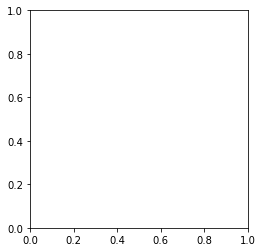

In [21]:
figueroa.plot ('day')

Still nothing! After reviewing my notes, I see that 'day' has to be converted into a dataframe. This will convert it into a table that Python can interpret and plot.

In [22]:
type(day)

pandas.core.series.Series

Ah yes! It is indeed *not* a dataframe. Let's change it to a dataframe. 

In [23]:
day = day.reset_index ()
day

,index,day_of_week
0,Thursday,28
1,Wednesday,27
2,Friday,26
3,Sunday,24
4,Saturday,20
5,Tuesday,19
6,Monday,17


Perfect! We should be all set now. Let's try again. 

<AxesSubplot:>

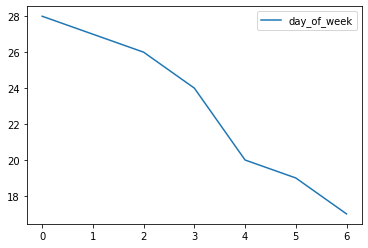

In [26]:
day.plot ()

Let's make this a bar plot and give it some more context. I have to update the column names first. 

In [36]:
day.columns = ['Day', 'Number of Collisions']

Let's make sure it grafted correctly.

In [37]:
day

,Day,Number of Collisions
0,Thursday,28
1,Wednesday,27
2,Friday,26
3,Sunday,24
4,Saturday,20
5,Tuesday,19
6,Monday,17


Looks good! Now let's apply our new column titles to our bar graph.

<AxesSubplot:title={'center':'Collisions on Figeuroa Blvd - Nov. 2018 - Feb. 2020'}, xlabel='Day'>

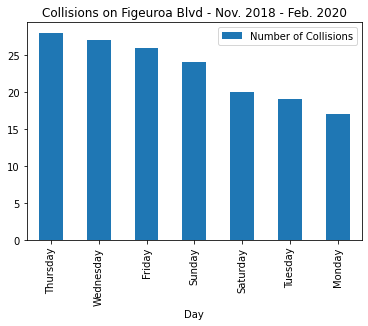

In [39]:
day.plot.bar (x = 'Day', y = 'Number of Collisions', title = 'Collisions on Figeuroa Blvd - Nov. 2018 - Feb. 2020')

Excellent! As we saw earlier, we have LOTS of data to work with for each collision. I'm going to try to do map of all the collisions to see if there is a specific stress point on this corridor. To begin, I'm going to trim my dataset.

In [46]:
figueroa_2 = ['collision_date', 'collision_time', 'day_of_week', 'direction', 'point_x', 'point_y', 'pcf_viol_category', 'type_of_collision', 'road_surface', 'lighting', 'movement1', 'partytype2']

Okay, let's to a quick check to see all our columns made it over.

In [49]:
figueroa[figueroa_2].info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   collision_date     161 non-null    object
 1   collision_time     161 non-null    object
 2   day_of_week        161 non-null    object
 3   direction          161 non-null    object
 4   point_x            161 non-null    object
 5   point_y            161 non-null    object
 6   pcf_viol_category  161 non-null    object
 7   type_of_collision  161 non-null    object
 8   road_surface       161 non-null    object
 9   lighting           161 non-null    object
 10  movement1          161 non-null    object
 11  partytype2         161 non-null    object
dtypes: object(12)
memory usage: 15.2+ KB


They're all there! I'm going to do a quick check to see how the data looks in its Python table.

In [51]:
figueroa[figueroa_2]

,collision_date,collision_time,day_of_week,direction,point_x,point_y,pcf_viol_category,type_of_collision,road_surface,lighting,movement1,partytype2
0,2/13/19,2310,Wednesday,Not Stated,-118.2592621,34.05004501,Automobile Right of Way,Not Stated,Wet,Dark - Street Lights,Making Left Turn,Bicyclist
1,12/6/18,1430,Thursday,North,-118.2756874,34.02871323,Unsafe Speed,Sideswipe,Wet,Daylight,Proceeding Straight,Parked Vehicle
2,11/30/18,1125,Friday,North,-118.2608657,34.04835129,Unsafe Speed,Rear End,Not Stated,Daylight,Proceeding Straight,Driver
3,12/23/18,2500,Sunday,North,-118.2622159,34.04685211,Unsafe Starting or Backing,Rear End,Dry,Not Stated,Backing,Parked Vehicle
4,1/1/19,25,Tuesday,North,-118.265091,34.04380035,Pedestrian Violation,Vehicle / Pedestrian,Dry,Dark - Street Lights,Proceeding Straight,Pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...
156,2/13/20,1520,Thursday,South,-118.2729766,34.03293991,Pedestrian Right of Way,Vehicle / Pedestrian,Dry,Daylight,Proceeding Straight,Pedestrian
157,2/7/20,905,Friday,Not Stated,-118.2729622,34.03296661,Automobile Right of Way,Broadside,Dry,Daylight,Making Left Turn,Driver
158,2/11/20,610,Tuesday,Not Stated,-118.2599022,34.04938507,Unknown,Broadside,Dry,Daylight,Proceeding Straight,Parked Vehicle
159,2/24/20,805,Monday,Not Stated,-118.2729622,34.03296661,Automobile Right of Way,Broadside,Dry,Daylight,Making Left Turn,Driver


Looks great! Now I'm going to import folium so we can plug this into a map.

In [52]:
import folium

I'm going to center the map to be just south of LA Live where I'm estimating to be approximately the centerpoint of the corridor

In [55]:
m = folium.Map(location=[34.04049757954625, -118.26802859402197])
m

We've got our map! Now let's plug in our collision locations. Let me run a loop and pull just some of the data we trimmed. 

In [73]:
for index, row in figueroa[figueroa_2].iterrows():
    print(row.point_x, row.point_y, row.collision_time, row.day_of_week, row.pcf_viol_category, row.partytype2)

-118.2592621 34.05004501 2310 Wednesday Automobile Right of Way Bicyclist
-118.2756874 34.02871323 1430 Thursday Unsafe Speed Parked Vehicle
-118.2608657 34.04835129 1125 Friday Unsafe Speed Driver
-118.2622159 34.04685211 2500 Sunday Unsafe Starting or Backing Parked Vehicle
-118.265091 34.04380035 25 Tuesday Pedestrian Violation Pedestrian
-118.2617508 34.04735947 2315 Tuesday Pedestrian Violation Pedestrian
-118.2612421 34.04793549 230 Sunday Pedestrian Right of Way Pedestrian
-118.2760422 34.02815628 1830 Sunday Automobile Right of Way Driver
-118.2749022 34.02994537 2045 Wednesday Unsafe Speed Driver
-118.2608455 34.04837418 930 Monday Unsafe Speed Driver
-118.2652021 34.04367447 1450 Wednesday Traffic Signals and Signs Driver
-118.2609221 34.04829025 1540 Thursday Unsafe Lane Change Driver
-118.2741144 34.03116226 1830 Wednesday Improper Turning Driver
-118.2749022 34.02994537 2345 Thursday Automobile Right of Way Other
-118.2604081 34.04884338 1410 Thursday Following Too Closely

Now I will plug in my markers so the collisions can populate on the map

In [82]:
for index, row in figueroa[figueroa_2].iterrows():
    folium.Marker([row.point_x, row.point_y], popup=row.day_of_week, tooltip=row.day_of_week).add_to(m)
m    

Not seeing any markers. I wonder if it doesn't like that I haven't converted my trimmed datset into it's own standalone variable. I'm going to rename it "figueroa_trimmed" to avoid any confusion.

In [83]:
figueroa_trimmed = figueroa[figueroa_2].copy()
figueroa_trimmed

,collision_date,collision_time,day_of_week,direction,point_x,point_y,pcf_viol_category,type_of_collision,road_surface,lighting,movement1,partytype2
0,2/13/19,2310,Wednesday,Not Stated,-118.2592621,34.05004501,Automobile Right of Way,Not Stated,Wet,Dark - Street Lights,Making Left Turn,Bicyclist
1,12/6/18,1430,Thursday,North,-118.2756874,34.02871323,Unsafe Speed,Sideswipe,Wet,Daylight,Proceeding Straight,Parked Vehicle
2,11/30/18,1125,Friday,North,-118.2608657,34.04835129,Unsafe Speed,Rear End,Not Stated,Daylight,Proceeding Straight,Driver
3,12/23/18,2500,Sunday,North,-118.2622159,34.04685211,Unsafe Starting or Backing,Rear End,Dry,Not Stated,Backing,Parked Vehicle
4,1/1/19,25,Tuesday,North,-118.265091,34.04380035,Pedestrian Violation,Vehicle / Pedestrian,Dry,Dark - Street Lights,Proceeding Straight,Pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...
156,2/13/20,1520,Thursday,South,-118.2729766,34.03293991,Pedestrian Right of Way,Vehicle / Pedestrian,Dry,Daylight,Proceeding Straight,Pedestrian
157,2/7/20,905,Friday,Not Stated,-118.2729622,34.03296661,Automobile Right of Way,Broadside,Dry,Daylight,Making Left Turn,Driver
158,2/11/20,610,Tuesday,Not Stated,-118.2599022,34.04938507,Unknown,Broadside,Dry,Daylight,Proceeding Straight,Parked Vehicle
159,2/24/20,805,Monday,Not Stated,-118.2729622,34.03296661,Automobile Right of Way,Broadside,Dry,Daylight,Making Left Turn,Driver


In [89]:
for index, row in figueroa_trimmed.iterrows():
    folium.Marker([row.point_y, row.point_x], popup=row.day_of_week, tooltip=row.day_of_week).add_to(m)
m 

I got it! It looks like the issue was that my longitude and latitude measurments from point_x and point_y were not in the correct order. Wilshire Boulevard and Figueroa Street appears to be the intersection with the most collisions. 